## Pneumonia Prediction using X-Ray imaging dataset by Convolutional Neural Network

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import numpy as np
import pandas as pd
from PIL import Image
from glob import glob
import tensorflow as tf
import pandas as pd

### Processing the image dataset

In [27]:
main_path = "D:/VJTI/3rd Year/6th Sem/ML Lab/Pneumonia Detection using CNN/chest_xray"

# Storing the paths of images in lists, divided by train, test, and validation and split them into two classes: Normal and Pneumonia.
#train_normal, test_normal, validation_normal etc are basically lists containing the paths of images.

train_normal = glob(os.path.join(main_path, "train", "NORMAL", "*.jpeg"))
train_pneumonia = glob(os.path.join(main_path, "train", "PNEUMONIA", "*.jpeg"))

test_normal = glob(os.path.join(main_path, "test", "NORMAL", "*.jpeg"))
test_pneumonia = glob(os.path.join(main_path, "test", "PNEUMONIA", "*.jpeg"))

val_normal = glob(os.path.join(main_path, "val", "NORMAL", "*.jpeg"))
val_pneumonia = glob(os.path.join(main_path, "val", "PNEUMONIA", "*.jpeg"))


#Making Pandas Dataframes having two columns: 1.Class: Normal/Pneumonia 2.Image: Path of image.
#Implementing training dataset
df_train = pd.DataFrame({
    'class': ['Normal'] * len(train_normal) + ['Pneumonia'] * len(train_pneumonia),
    'image': train_normal + train_pneumonia
}) 

#Implementing testing dataset
df_test = pd.DataFrame({
    'class': ['Normal'] * len(test_normal) + ['Pneumonia'] * len(test_pneumonia),
    'image': test_normal + test_pneumonia
})

#Implementing validation dataset
df_val = pd.DataFrame({
    'class': ['Normal'] * len(val_normal) + ['Pneumonia'] * len(val_pneumonia),
    'image': val_normal + val_pneumonia
})

In [28]:
train_normal

['D:/VJTI/3rd Year/6th Sem/ML Lab/Pneumonia Detection using CNN/chest_xray\\train\\NORMAL\\IM-0115-0001.jpeg',
 'D:/VJTI/3rd Year/6th Sem/ML Lab/Pneumonia Detection using CNN/chest_xray\\train\\NORMAL\\IM-0117-0001.jpeg',
 'D:/VJTI/3rd Year/6th Sem/ML Lab/Pneumonia Detection using CNN/chest_xray\\train\\NORMAL\\IM-0119-0001.jpeg',
 'D:/VJTI/3rd Year/6th Sem/ML Lab/Pneumonia Detection using CNN/chest_xray\\train\\NORMAL\\IM-0122-0001.jpeg',
 'D:/VJTI/3rd Year/6th Sem/ML Lab/Pneumonia Detection using CNN/chest_xray\\train\\NORMAL\\IM-0125-0001.jpeg',
 'D:/VJTI/3rd Year/6th Sem/ML Lab/Pneumonia Detection using CNN/chest_xray\\train\\NORMAL\\IM-0127-0001.jpeg',
 'D:/VJTI/3rd Year/6th Sem/ML Lab/Pneumonia Detection using CNN/chest_xray\\train\\NORMAL\\IM-0128-0001.jpeg',
 'D:/VJTI/3rd Year/6th Sem/ML Lab/Pneumonia Detection using CNN/chest_xray\\train\\NORMAL\\IM-0129-0001.jpeg',
 'D:/VJTI/3rd Year/6th Sem/ML Lab/Pneumonia Detection using CNN/chest_xray\\train\\NORMAL\\IM-0131-0001.jpeg',
 

In [29]:
df_train

,class,image
0,Normal,D:/VJTI/3rd Year/6th Sem/ML Lab/Pneumonia Dete...
1,Normal,D:/VJTI/3rd Year/6th Sem/ML Lab/Pneumonia Dete...
2,Normal,D:/VJTI/3rd Year/6th Sem/ML Lab/Pneumonia Dete...
3,Normal,D:/VJTI/3rd Year/6th Sem/ML Lab/Pneumonia Dete...
4,Normal,D:/VJTI/3rd Year/6th Sem/ML Lab/Pneumonia Dete...
...,...,...
5211,Pneumonia,D:/VJTI/3rd Year/6th Sem/ML Lab/Pneumonia Dete...
5212,Pneumonia,D:/VJTI/3rd Year/6th Sem/ML Lab/Pneumonia Dete...
5213,Pneumonia,D:/VJTI/3rd Year/6th Sem/ML Lab/Pneumonia Dete...
5214,Pneumonia,D:/VJTI/3rd Year/6th Sem/ML Lab/Pneumonia Dete...


In [30]:
df_test

,class,image
0,Normal,D:/VJTI/3rd Year/6th Sem/ML Lab/Pneumonia Dete...
1,Normal,D:/VJTI/3rd Year/6th Sem/ML Lab/Pneumonia Dete...
2,Normal,D:/VJTI/3rd Year/6th Sem/ML Lab/Pneumonia Dete...
3,Normal,D:/VJTI/3rd Year/6th Sem/ML Lab/Pneumonia Dete...
4,Normal,D:/VJTI/3rd Year/6th Sem/ML Lab/Pneumonia Dete...
...,...,...
619,Pneumonia,D:/VJTI/3rd Year/6th Sem/ML Lab/Pneumonia Dete...
620,Pneumonia,D:/VJTI/3rd Year/6th Sem/ML Lab/Pneumonia Dete...
621,Pneumonia,D:/VJTI/3rd Year/6th Sem/ML Lab/Pneumonia Dete...
622,Pneumonia,D:/VJTI/3rd Year/6th Sem/ML Lab/Pneumonia Dete...


In [31]:
df_val

,class,image
0,Normal,D:/VJTI/3rd Year/6th Sem/ML Lab/Pneumonia Dete...
1,Normal,D:/VJTI/3rd Year/6th Sem/ML Lab/Pneumonia Dete...
2,Normal,D:/VJTI/3rd Year/6th Sem/ML Lab/Pneumonia Dete...
3,Normal,D:/VJTI/3rd Year/6th Sem/ML Lab/Pneumonia Dete...
4,Normal,D:/VJTI/3rd Year/6th Sem/ML Lab/Pneumonia Dete...
5,Normal,D:/VJTI/3rd Year/6th Sem/ML Lab/Pneumonia Dete...
6,Normal,D:/VJTI/3rd Year/6th Sem/ML Lab/Pneumonia Dete...
7,Normal,D:/VJTI/3rd Year/6th Sem/ML Lab/Pneumonia Dete...
8,Pneumonia,D:/VJTI/3rd Year/6th Sem/ML Lab/Pneumonia Dete...
9,Pneumonia,D:/VJTI/3rd Year/6th Sem/ML Lab/Pneumonia Dete...


### Combining the train and validation dataset

In [32]:
df_train = pd.concat([df_train, df_val], axis=0)

# Reset the index 
df_train = df_train.reset_index(drop=True)


In [33]:
df_train

,class,image
0,Normal,D:/VJTI/3rd Year/6th Sem/ML Lab/Pneumonia Dete...
1,Normal,D:/VJTI/3rd Year/6th Sem/ML Lab/Pneumonia Dete...
2,Normal,D:/VJTI/3rd Year/6th Sem/ML Lab/Pneumonia Dete...
3,Normal,D:/VJTI/3rd Year/6th Sem/ML Lab/Pneumonia Dete...
4,Normal,D:/VJTI/3rd Year/6th Sem/ML Lab/Pneumonia Dete...
...,...,...
5227,Pneumonia,D:/VJTI/3rd Year/6th Sem/ML Lab/Pneumonia Dete...
5228,Pneumonia,D:/VJTI/3rd Year/6th Sem/ML Lab/Pneumonia Dete...
5229,Pneumonia,D:/VJTI/3rd Year/6th Sem/ML Lab/Pneumonia Dete...
5230,Pneumonia,D:/VJTI/3rd Year/6th Sem/ML Lab/Pneumonia Dete...


### Graphical representation of the diversity of dataset

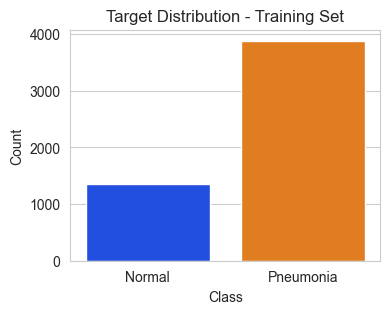

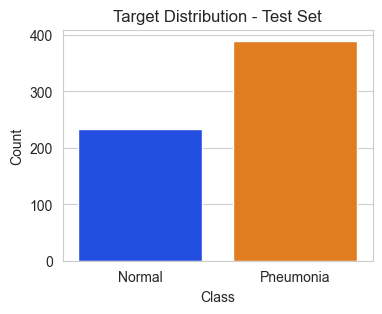

In [34]:
sns.set_palette("bright")
sns.set_style("whitegrid")

# Plotting target distribution in the training set
plt.figure(figsize=(4, 3))
sns.countplot(data=df_train, x='class')
plt.title('Target Distribution - Training Set')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Plotting target distribution in the test set
plt.figure(figsize=(4, 3))
sns.countplot(data=df_test, x='class')
plt.title('Target Distribution - Test Set')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


### Displaying image

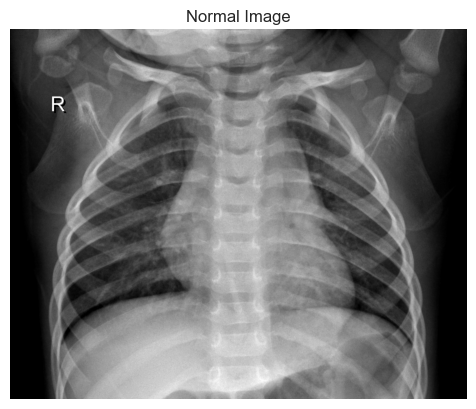

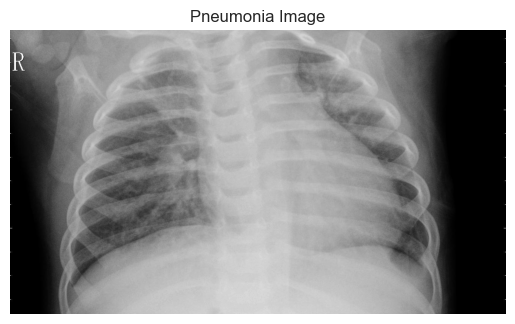

In [35]:
image_path1 = df_train['image'][1]
try:
    image1 = Image.open(image_path1)
    plt.imshow(image1, cmap='gray')
    plt.title('Normal Image')
    plt.axis('off')
    plt.show()
except (IOError, OSError) as e:
    print(f"Error opening image: {e}")

image_path2 = df_train['image'][5110]
try:
    image2 = Image.open(image_path2)
    plt.imshow(image2, cmap='gray')
    plt.title('Pneumonia Image')
    plt.axis('off')
    plt.show()
except (IOError, OSError) as e:
    print(f"Error opening image: {e}")

In [36]:
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(df_train, test_size = 0.20, random_state = 42, stratify = df_train['class'])

#Stratify: Ensures that the distribution of a particular characteristic or class is preserved across different subsets of the data.
#Train and test split is evenly done

In [37]:
train_df

,class,image
3558,Pneumonia,D:/VJTI/3rd Year/6th Sem/ML Lab/Pneumonia Dete...
2858,Pneumonia,D:/VJTI/3rd Year/6th Sem/ML Lab/Pneumonia Dete...
2673,Pneumonia,D:/VJTI/3rd Year/6th Sem/ML Lab/Pneumonia Dete...
1199,Normal,D:/VJTI/3rd Year/6th Sem/ML Lab/Pneumonia Dete...
4611,Pneumonia,D:/VJTI/3rd Year/6th Sem/ML Lab/Pneumonia Dete...
...,...,...
3468,Pneumonia,D:/VJTI/3rd Year/6th Sem/ML Lab/Pneumonia Dete...
678,Normal,D:/VJTI/3rd Year/6th Sem/ML Lab/Pneumonia Dete...
1552,Pneumonia,D:/VJTI/3rd Year/6th Sem/ML Lab/Pneumonia Dete...
2761,Pneumonia,D:/VJTI/3rd Year/6th Sem/ML Lab/Pneumonia Dete...


In [38]:
val_df

,class,image
2937,Pneumonia,D:/VJTI/3rd Year/6th Sem/ML Lab/Pneumonia Dete...
4870,Pneumonia,D:/VJTI/3rd Year/6th Sem/ML Lab/Pneumonia Dete...
3169,Pneumonia,D:/VJTI/3rd Year/6th Sem/ML Lab/Pneumonia Dete...
972,Normal,D:/VJTI/3rd Year/6th Sem/ML Lab/Pneumonia Dete...
3051,Pneumonia,D:/VJTI/3rd Year/6th Sem/ML Lab/Pneumonia Dete...
...,...,...
253,Normal,D:/VJTI/3rd Year/6th Sem/ML Lab/Pneumonia Dete...
4307,Pneumonia,D:/VJTI/3rd Year/6th Sem/ML Lab/Pneumonia Dete...
687,Normal,D:/VJTI/3rd Year/6th Sem/ML Lab/Pneumonia Dete...
3409,Pneumonia,D:/VJTI/3rd Year/6th Sem/ML Lab/Pneumonia Dete...


#### Count of examples in each class in each split (The dataset is split in an evenly manner)

In [39]:
train_df['class'].value_counts()

Pneumonia    3106
Normal       1079
Name: class, dtype: int64

In [40]:
val_df['class'].value_counts()

Pneumonia    777
Normal       270
Name: class, dtype: int64

In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data generators
#Data generators are used when dealing with large datasets so that the entire dataset doesn't need to be loaded in the memory at once.
train_datagen = ImageDataGenerator(
    rescale=1./255, #Dividing each pixel value by 255 so that the pixel range [0,255] boils down to [0,1] float.
    shear_range=0.2, #Tilting the image in a specific direction
    zoom_range=0.2,
    rotation_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True #Generator randomly flips the image horizontally (left to right) during each epoch
)

val_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale pixel values

# Create data generators
ds_train = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='image',
    y_col='class',
    class_mode='binary',
    target_size=(224, 224), #Resizing all images to 224x224 pixels.
    batch_size=32 #We use batches so that the entire dataset does not need to be loaded at once in the memory which can cause memory overflow.
)

ds_val = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='image',
    y_col='class',
    class_mode='binary',
    target_size=(224, 224),
    batch_size=32
)

ds_test = val_datagen.flow_from_dataframe(
    dataframe=df_test,
    x_col='image',
    y_col='class',
    class_mode='binary',
    target_size=(224, 224),
    batch_size=1
)


Found 4185 validated image filenames belonging to 2 classes.
Found 1047 validated image filenames belonging to 2 classes.
Found 624 validated image filenames belonging to 2 classes.


### Convolutional Neural Network model using Tensorflow

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout

def create_model():
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), strides=1, padding='valid', activation='relu', input_shape=(224, 224, 3)))
    model.add(BatchNormalization()) #Normalizes the activations of the previous layer to improve training stability and accelerate convergence.
    model.add(MaxPooling2D((2, 2), strides=2, padding='valid')) # Performs max pooling with a pool size of (2, 2) and a stride of 2, reducing the spatial dimensions of the feature maps by half.
    
    model.add(Conv2D(64, (3, 3), strides=1, padding='valid', activation='relu'))
    model.add(Dropout(0.1))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2), strides=2, padding='valid'))
    
    model.add(Conv2D(64, (3, 3), strides=1, padding='valid', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2), strides=2, padding='valid'))
    
    model.add(Conv2D(128, (3, 3), strides=1, padding='valid', activation='relu'))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2), strides=2, padding='valid'))
    
    model.add(Conv2D(256, (3, 3), strides=1, padding='valid', activation='relu'))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2), strides=2, padding='valid'))
    
    model.add(Flatten())
    model.add(Dense(units=256, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=1, activation='sigmoid')) #Output layer with single unit and sigmoid activation since binary classification.
    
    return model


In [43]:
model = create_model()

In [44]:
from tensorflow.keras.optimizers import Adam
#Using Adam optimizer
model.compile(
    optimizer=Adam(learning_rate=3e-5),
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 batch_normalization_5 (Bat  (None, 222, 222, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 dropout_5 (Dropout)         (None, 109, 109, 64)      0         
                                                                 
 batch_normalization_6 (Bat  (None, 109, 109, 64)     

In [45]:
from tensorflow.keras.callbacks import EarlyStopping ,ReduceLROnPlateau

# Create the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, min_delta=1e-7,restore_best_weights=True) #EarlyStopping: Used to stop the training process early if certain conditions are met

plateau = ReduceLROnPlateau(monitor='val_loss',factor = 0.2,patience = 2,min_delt = 1e-7,cooldown = 0,verbose = 1)  #ReduceLROnPlateau: Reduces the learning rate when the monitored metric has stopped improving

### Training the model

In [46]:
# Train the model with early stopping
history = model.fit(ds_train,
                    batch_size = 32,
                    epochs = 50,
                    validation_data=ds_val,
                    steps_per_epoch=(len(train_df)/32),
                    validation_steps=(len(val_df)/32));

Epoch 1/50
130/130 [==============================] - 174s 1s/step - loss: 0.3245 - binary_accuracy: 0.8573 - val_loss: 0.8779 - val_binary_accuracy: 0.7421
Epoch 2/50
130/130 [==============================] - 169s 1s/step - loss: 0.2246 - binary_accuracy: 0.9006 - val_loss: 1.4688 - val_binary_accuracy: 0.7421
Epoch 3/50
130/130 [==============================] - 176s 1s/step - loss: 0.2109 - binary_accuracy: 0.9145 - val_loss: 1.4319 - val_binary_accuracy: 0.7421
Epoch 4/50
130/130 [==============================] - 172s 1s/step - loss: 0.1931 - binary_accuracy: 0.9238 - val_loss: 0.6639 - val_binary_accuracy: 0.7459
Epoch 5/50
130/130 [==============================] - 169s 1s/step - loss: 0.1847 - binary_accuracy: 0.9245 - val_loss: 0.1971 - val_binary_accuracy: 0.9140
Epoch 6/50
130/130 [==============================] - 179s 1s/step - loss: 0.1797 - binary_accuracy: 0.9264 - val_loss: 0.1218 - val_binary_accuracy: 0.9570
Epoch 7/50
130/130 [==============================] - 176s

KeyboardInterrupt: 

In [47]:
# Save the trained model after training is completed
model.save('New_Trained_CNN_Model.h5')


C:\Users\rushi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Visualizing Learning Curve (Accuracy)

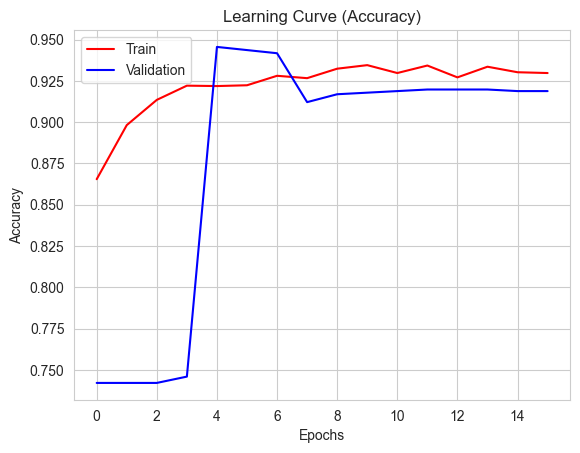

In [49]:
import matplotlib.pyplot as plt

plt.plot(history.history['binary_accuracy'], color='red', label='Train')
plt.plot(history.history['val_binary_accuracy'], color='blue', label='Validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Learning Curve (Accuracy)')
plt.show()

### Visualizing Learning Curve (Loss)

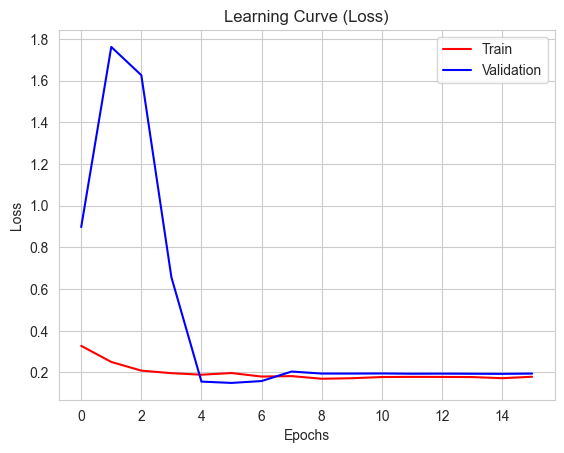

In [50]:
plt.plot(history.history['loss'], color='red', label='Train')
plt.plot(history.history['val_loss'], color='blue', label='Validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve (Loss)')
plt.show()

### Model Analysis

In [51]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Evaluate the model on the validation dataset
val_loss, val_accuracy = model.evaluate(ds_val,steps = int(len(ds_val)/32), verbose = 0)

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(ds_test,steps = len(ds_test), verbose = 0)

# Get the predicted labels and true labels for the test dataset
test_labels = ds_test.labels
predicted_labels = model.predict(ds_test)

# Flatten the predicted labels to a 1D array
predicted_labels = np.round(predicted_labels).flatten()

# Calculate evaluation metrics
cm = confusion_matrix(test_labels, predicted_labels)
classification_rep = classification_report(test_labels, predicted_labels)

# Print the evaluation metrics
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(classification_rep)


624/624 [==============================] - 8s 13ms/step
Validation Loss: 0.07795669138431549
Validation Accuracy: 0.96875
Test Loss: 0.33235904574394226
Test Accuracy: 0.870192289352417
Confusion Matrix:
[[ 69 165]
 [ 98 292]]
Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.29      0.34       234
           1       0.64      0.75      0.69       390

    accuracy                           0.58       624
   macro avg       0.53      0.52      0.52       624
weighted avg       0.55      0.58      0.56       624

